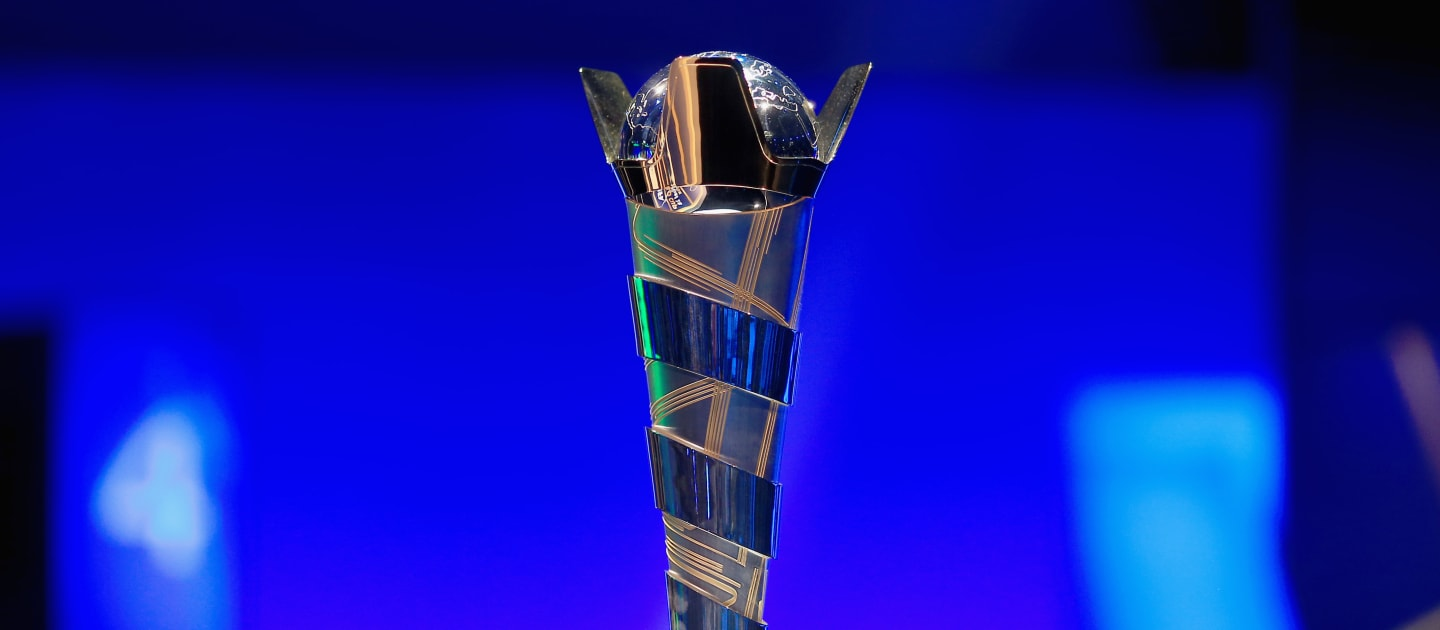

In [1]:
from IPython.display import Image
Image(filename='trophy.jpg')

# Winning Combination for FIFA EWorld Cup

Individual Project - **Pranav Prajapati**

### Project Overview

The Fédération Internationale de Football Association (FIFA) is well
known for organizing global soccer events like the world cup and euros. Due to the increasing popularity of video games and especially FIFA SOCCER game, FIFA has started a virtual world cup tournament called as [FIFA EWorld Cup]
(https://www.fifa.com/fifaeworldcup/). With prize money as big as 100000 dollars,  players can earn up to 2 million dollars per year. 

There are many factors to consider when building the perfect team to win matches. One cannot have only top players at every position as there are many constraints laid on the candidates. Hence every player has to find
the right combination and select players according to his style of play.

### Purpose

The Exploratory Data Analysis and Interactive visualizations will help a certain user understand the roster of the players available and what kind of strategy the user can use to build a team on a certain budget.

The Regression Analysis will give the user complete knowledge of whether his players can be traded at what price and how much potential do all the young players can achieve.

### Tools Used

**Python**

Visualization Libraries : [**Matplotlib**](https://matplotlib.org) and [**Plotly**](https://plot.ly/python/)

## Analysis

In [21]:
import numpy as np # linear algebra
import pandas as pd
import os
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go
from plotly import tools
from wordcloud import WordCloud     #word cloud library
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure
import datetime
import seaborn as sns
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import math

# Using plotly + cufflinks in offline mode

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

#### Prepare Data

In [3]:
df = pd.read_csv('/Users/pranavprajapati/Desktop/Projects_2019/Fifa_players/data.csv')

**All the Features in the dataset**

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

**A look at highly correlated numerical features**

In [17]:
df2 = df[['Age', 'Value', 'Wage', 'Potential','Acceleration','ShotPower', 'SprintSpeed', 'Finishing', 'Stamina', 'Strength', 'Vision', 'BallControl','Club','Position','Overall','Name']]

df2.corr().iplot(kind='heatmap',colorscale='ylgn')

**Histogram of players age**

We can see most players have age in the early twenties.

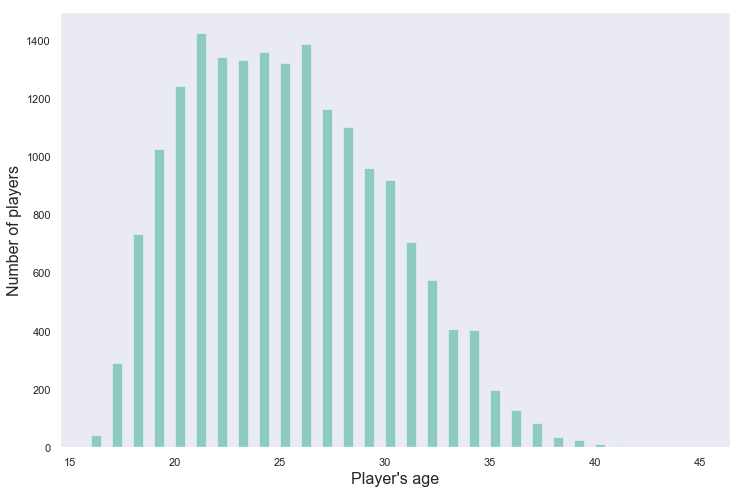

In [6]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)

plt.show()

**Distribution of age in top clubs**


/Users/pranavprajapati/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



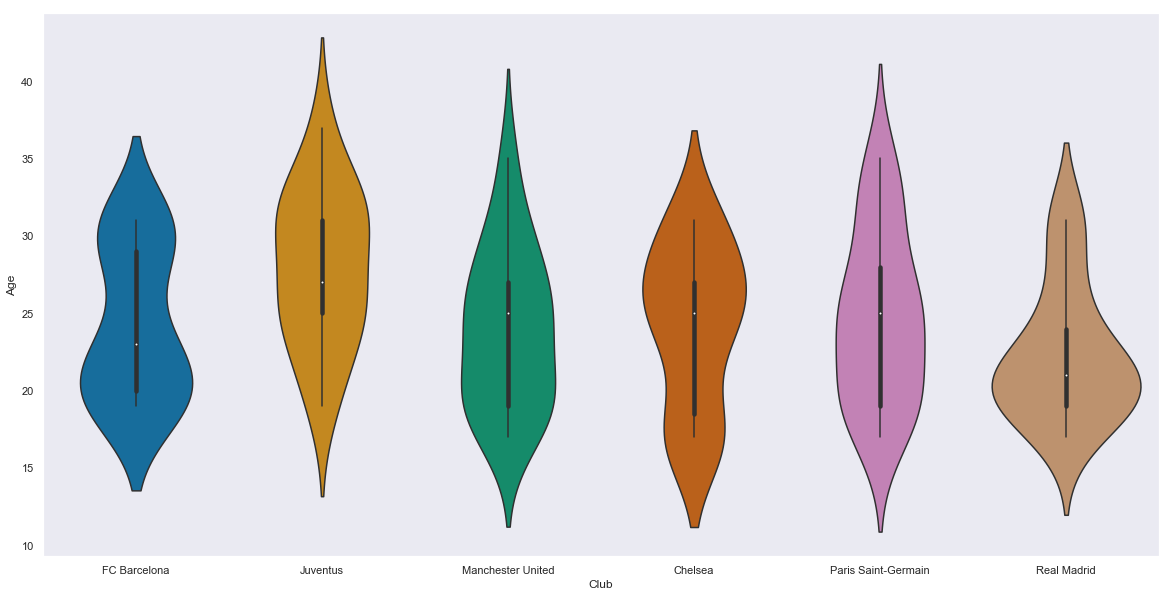

In [7]:
# Compare six clubs in relation to age
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Chelsea', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);


Let's look at who has the oldest players. You would not want to play with these teams as old players will lose their skills.

In [8]:

print(df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(5))

Club
Cardiff City     863
Villarreal CF    851
Burnley          850
Frosinone        843
Chelsea          832
Name: Age, dtype: int64


Let's look at who has the youngest players. You would not want to play with these teams as the young players are not skilled yet.

In [9]:
df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).head(5)

Club
Derry City      398
Sligo Rovers    421
Limerick FC     436
Tromsø IL       476
FK Haugesund    508
Name: Age, dtype: int64

**The Best Player per position**

In [10]:
display(HTML(df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
A. Griezmann,CAM
D. Godín,CB
Sergio Busquets,CDM
Luis Alberto,CF
Thiago,CM
De Gea,GK
J. Rodríguez,LAM
Marcelo,LB
G. Chiellini,LCB
T. Kroos,LCM


**Top 3 Features per position**

In [11]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

In [12]:
# Prepare Data
fifa_data = pd.read_csv('/Users/pranavprajapati/Desktop/Projects_2019/Fifa_players/data.csv')

**Some additional Data Cleaning**


In [13]:
fifa_data['array'] = fifa_data['Unnamed: 0']+1
#fifa_data.info()
wage = fifa_data['Wage'].map(lambda x: x.replace("€", ""))
#wage.head()                          
                       
#removes K -> it will be like that: '100K' -> '100'
wage = wage.map(lambda x: x.replace("K", ""))
#wage.head()

#We'll edit 'Value' to compare our values                                                 
#removes € -> it will be like that: '£100M or £100K' -> '100M or 100K'
value = fifa_data['Value'].map(lambda x: x.replace("€", ""))
                                                                       
#removes M -> it will be like that: '100M' -> '100 or 100K'
value = value.map(lambda x: x.replace("M", ""))
#value.head()
#removes K -> it will be like that: '100K' -> '100'
value = value.map(lambda x: x.replace("K", ""))
#value.head()  

release = fifa_data['Release Clause'].astype('str') 
release = fifa_data['Release Clause'].astype(str).map(lambda x: x.replace("€", ""))
release = release.map(lambda x: x.replace("M", ""))
release = release.map(lambda x: x.replace("K", ""))
wage = wage.astype("int")*1000

value = value.astype("float")*1000000
release = release.astype("float")*1000000
#Let's create new columns now
fifa_data['wage']=wage
fifa_data['value']=value
fifa_data['release']=release
fifa_data.head()
fifa_data['Joined'] = pd.to_datetime(fifa_data['Joined'])
fifa_data['Joined'] = fifa_data['Joined'].dt.year
#fifa_data['Joined'].head()

In [14]:
df_frame4= fifa_data[['Name','release','Joined','wage']]
df_frame4 = df_frame4.sort_values(by=['wage'],ascending=False)
df_frame4 =df_frame4.dropna()
#df_frame4.head(20)

**Top 10 Players with the best growth potential**

We can see A.Dabo is the highest rated at 60 and has the best growth.

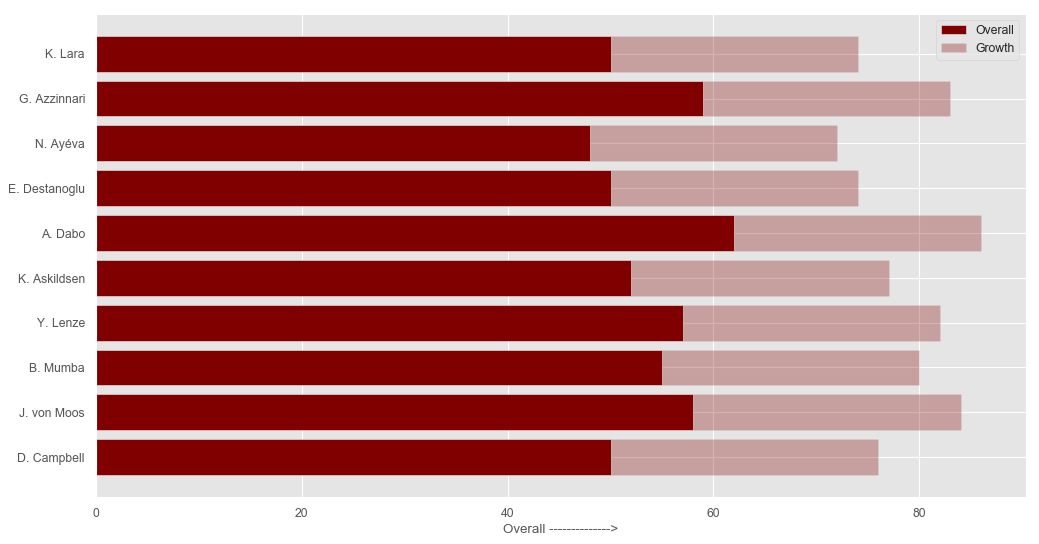

In [29]:
potential_df = fifa_data.filter(['Name','Age','Overall','Potential'])
potential_df['Growth'] = potential_df['Potential'] - potential_df['Overall']
potential_df = potential_df.sort_values(by=['Growth'],ascending=False)
potential_df = potential_df.iloc[:10]
players_list = list(potential_df.iloc[:, 0])
overall_list = list(potential_df.iloc[:,2])
growth_list = list(potential_df.iloc[:,4])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(players_list, overall_list, color='maroon', label='Overall')
    plt.barh(players_list, growth_list, left=overall_list, color='maroon', label='Growth', alpha=0.3)
    plt.legend()
    
    plt.xlabel('Overall -------------->')
    plt.show()

**Nationalities of FIFA 19 Players**

Feel free to rotate and zooom into the plot

In [75]:
df1 = df.groupby("Nationality").size().reset_index(name="Count")

df1.iplot(
    kind='choropleth', locations='Nationality',  z ='Count',
    text = 'Nationality', locationmode = 'country names', theme='white',
    colorscale='oranges', 
    projection = dict(
            type = 'natural earth'
        ))

** Which country has the top talent?**

Below graph shows the RATING vs COUNT graph.

Spain and Brazil have the best talent.

In [52]:
df_spain = df.loc[df['Nationality'] == 'Spain']
df_brazil = df.loc[df['Nationality'] == 'Brazil']
df_england = df.loc[df['Nationality'] == 'England']
trace1 = go.Histogram(
    x=df_spain.Overall,
    opacity=0.75,
    name = "Spain",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=df_england.Overall,
    opacity=0.75,
    name = "England",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

trace3 = go.Histogram(
    x=df_brazil.Overall,
    opacity=0.75,
    name = "Brazil",
    marker=dict(color='rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Overall Rating by Country',
                   xaxis=dict(title='Rating'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


**Always having the best players may not be a good decision. The team balance can get compromised. This plot shows how a player's potential increases.**

In [30]:
# Prepare Data Frame
d_frame = fifa_data.iloc[:100,:]

#Creating trace1
trace1 = go.Scatter(
    x= d_frame.array,
    y= d_frame.Overall,
    mode='lines',
    name='Overall',
    marker= dict(color='blue'),
    text= d_frame.Name
)
#Creating trace2
trace2 = go.Scatter(
    x= d_frame.array,
    y= d_frame.Potential,
    mode='lines+markers',
    name='Potential',
    marker= dict(color='Red'),
    
    text= d_frame.Name
)
data = [trace1,trace2]
layout= dict(title="Comparing the 'Overall' and 'Potential' of players",
            xaxis= dict(title='Player Rank', ticklen=5, zeroline=False)
            )
fig= dict(data=data, layout=layout)
iplot(fig)

**Which Clubs have the best young talent?**

In [44]:
#Prepare Data Frame
d_frame2 = d_frame.iloc[:25,:]
donut= d_frame2.Club.value_counts()
labels = d_frame2.Club.value_counts().index

#Creat figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Club rates of the top 100 young players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

**The Top young Players can always be a great addition since they will always grow**

In [35]:
d_frame = fifa_data[(fifa_data['Overall'] > 80) & (fifa_data['Overall'] <= 85)& (fifa_data['Age'] <= 24)]
d_frame['array'] = range(1, len(d_frame) + 1)
d_frame = d_frame.reset_index()
# Prepare Data Frame
d_frame1 = d_frame.iloc[:10,:]

#create trace1
trace1 = go.Bar(
    x= d_frame1.array,
    y= d_frame1.Overall,
    name= 'Overall',
    marker= dict(color= 'purple',
                line= dict(color= 'rgb(0,0,0)', width=1)),
    text= d_frame1.Name
)
#Create trace2
trace2 = go.Bar(
    x= d_frame1.array,
    y= d_frame1.Potential,
    name= 'Potential',
    marker= dict(color= 'pink',
                line= dict(color='rgb(0,0,0)', width=1)),
)
data= [trace1, trace2]
layout= go.Layout(barmode= "group")
fig= go.Figure(data=data, layout=layout)
iplot(fig)

** You also want players to have unique skills like scoring Penalties and Free Kicks**

We can compare some of the top young players's skill . If you find defensive players with good penalty and free kick skills, then its a certain buy!

In [43]:
d_frame1 = d_frame.iloc[24:55,:]
#Create trace1
trace1= {
    'x': d_frame1.array,
    'y': d_frame1.FKAccuracy,
    'name': 'Free Kick',
    'type': 'bar',
    'text': d_frame1.Name
};
#Create trace2
trace2= {
    'x': d_frame1.array,
    'y': d_frame1.Penalties,
    'name': 'Penalty',
    'type': 'bar',
    'text': d_frame1.Name,
    'marker': dict(color= 'rgba(148, 255, 130,0.9)'),
};
data= [trace1, trace2]
layout= {
    'xaxis': {'title':'First 5 Player'},
    'barmode': 'relative',
  
};
fig = go.Figure(data=data, layout=layout)
iplot(fig)

** Who are the quick, agile and strong young players ?**

A Good Combination of all three will be a must have!

X axis - Ball Control

Y axis - Dribbling

Z axis - Shot Power

Zoom in and discover the player!

In [45]:
#Prepare Data Frame
d_frame3 = d_frame.iloc[:50,:]

#Create trace
trace = go.Scatter3d(
    x=d_frame3.BallControl,
    y=d_frame3.Dribbling,
    z=d_frame3.ShotPower,
    text= d_frame3.Name,
    mode='markers',
    marker=dict(
        size=12,
        color= 'red',          #set color to an array/list of desired value (plotly.ly)
#When we enters 'Fork Notebook' he describes 'z'. But why doesn't he recognize this right now? 
        colorscale='Viridis',   #Choose a colorscale
        opacity=0.8
    )
)
data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Wages and Price comparison of players**

There are some players who are important figures in thier own team so although thier wages are high, their value will be lower. Such players are a good buy !

In [47]:
#Prepare Data Frame
d_frame6 = fifa_data.iloc[:100,:]

#Create trace1
trace1 = go.Scatter(
    x=d_frame6.array,
    y=d_frame6.value,
    text= d_frame6.Name,
    name='value',
    marker= dict(color='rgba(26, 163, 242,0.9)'),
    mode= 'lines+markers'
)
#Create trace2
trace2 = go.Scatter(
    x=d_frame6.array,
    y=d_frame6.wage,
    xaxis='x2',
    yaxis='y2',
    text= d_frame6.Name,
    name='wage',
    marker= dict(color='rgba(70, 71, 71,0.9)'),
    mode= 'markers'
)
data = [trace1, trace2]
layout = go.Layout(
    title = "Top 100 players' wage and values",
    xaxis2=dict(
        domain=[0.3, 1],
        anchor='y2'
    ),
    yaxis2=dict(
        domain=[0.6, 1],
        anchor='x2'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Another Proof as to why one cannot just select all players from a team but has to look for different players in each team to get the right combination**

The below graph shoes all the top teams and their combined player values. Not much different!

In [48]:
d_frame = fifa_data.groupby("Club")["value"].mean().sort_values(ascending=False).head(10)

#Create trace
trace = go.Bar(
    x= fifa_data.array,
    y= d_frame,
    opacity = 0.75,
    text= fifa_data.Club,
    marker = dict(color='rgba(40, 10, 130,0.6)'))

data = [trace]
layout = go.Layout(barmode='group',
                  title='Top 10 teams paying maximum pay',
                  xaxis= dict(title= 'Array'),
                  yaxis= dict(title='Total Wage'),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**What is the most important position on the pitch ? **

As we can see that players with great 'Finishing' and 'Composure' ability are the ones with highest value. If anyone wants a high value player, it should be a goal scorer!

X Axis - Finishing

Y Axis - Composure

In [49]:
df_ = fifa_data.nlargest(100, 'Finishing')
df_['wage'] = df_['wage'] / 10000
color = [float(each) for each in df_.Finishing]


trace = go.Scatter(x=df_.Composure, y=df_.Finishing, mode='markers', marker={
    'color': color, 
    'size': df_.wage, 
    'showscale': True
}, text=df_.Name )

data = [trace]
layout = go.Layout(title='Player Finshing vs Composure', xaxis=dict(title='Composure'), yaxis=dict( title='Finishing'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

** Do I have enough options if not for the top players **

As we can see below we have plenty of talent pool to choose from. 

The X axis depicts the overall rating and y gives the count

In [51]:
df['Overall'].iplot(kind='hist', opacity=0.75, color='#007959', title='Overall Rating Distribution', yTitle='Count', xTitle='Overall Rating', bargap = 0.20)

## Regression Analysis to Predict Ratings
A small study to predict Ratings

In [68]:
df_fifa19 = pd.read_csv('/Users/pranavprajapati/Desktop/Projects_2019/Fifa_players/data.csv')
#DROP UNNECESSARY VALUES
drop_cols = df_fifa19.columns[28:54]
df_fifa19 = df_fifa19.drop(drop_cols, axis = 1)
df_fifa19 = df_fifa19.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause','Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df_fifa19 = df_fifa19.dropna()


**Creation of Simplified Positions, Converting some features to Binary**

In [69]:
#Turn Real Face into a binary indicator variable
def face_to_num(df_fifa19):
    if (df_fifa19['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df_fifa19):
    if (df_fifa19['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df_fifa19):
    if (df_fifa19['Position'] == 'GK'):
        return 'GK'
    elif ((df_fifa19['Position'] == 'RB') | (df_fifa19['Position'] == 'LB') | (df_fifa19['Position'] == 'CB') | (df_fifa19['Position'] == 'LCB') | (df_fifa19['Position'] == 'RCB') | (df_fifa19['Position'] == 'RWB') | (df_fifa19['Position'] == 'LWB') ):
        return 'DF'
    elif ((df_fifa19['Position'] == 'LDM') | (df_fifa19['Position'] == 'CDM') | (df_fifa19['Position'] == 'RDM')):
        return 'DM'
    elif ((df_fifa19['Position'] == 'LM') | (df_fifa19['Position'] == 'LCM') | (df_fifa19['Position'] == 'CM') | (df_fifa19['Position'] == 'RCM') | (df_fifa19['Position'] == 'RM')):
        return 'MF'
    elif ((df_fifa19['Position'] == 'LAM') | (df_fifa19['Position'] == 'CAM') | (df_fifa19['Position'] == 'RAM') | (df_fifa19['Position'] == 'LW') | (df_fifa19['Position'] == 'RW')):
        return 'AM'
    elif ((df_fifa19['Position'] == 'RS') | (df_fifa19['Position'] == 'ST') | (df_fifa19['Position'] == 'LS') | (df_fifa19['Position'] == 'CF') | (df_fifa19['Position'] == 'LF') | (df_fifa19['Position'] == 'RF')):
        return 'ST'
    else:
        return df_fifa19.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df_fifa19.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df_fifa19):
    if (df_fifa19.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df_fifa19.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


** Splitting Data into Test and Train **

Printing Shape

In [70]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


**Linear Regression**

In [71]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9331264416052403
RMSE : 1.7960473341030663


*Those are great results!*

**Let's see which are the most important features**

POTENTIAL, AGE and surprisingly REACTIONS

In [72]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

Weight,Feature
0.3642 ± 0.0060,Potential
0.1816 ± 0.0063,Age
0.0772 ± 0.0040,Reactions
0.0649 ± 0.0037,BallControl
0.0441 ± 0.0039,GKReflexes
0.0339 ± 0.0022,GKDiving
0.0255 ± 0.0009,ShortPassing
0.0249 ± 0.0017,HeadingAccuracy
0.0216 ± 0.0024,GKHandling
0.0143 ± 0.0012,Skill Moves


**Visualizing the Fit**

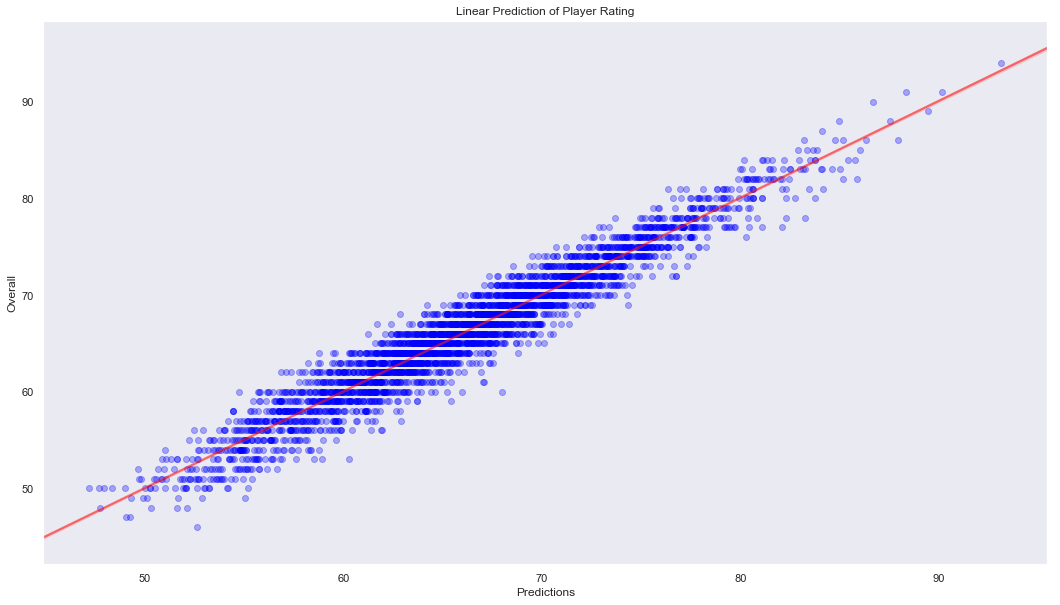

In [74]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'blue'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

### Additional Visualizations

I found this radar/polar chart project on github. These Visualizations can help the user find their favorite player's information.

In [59]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)
players = df[['Name','Strength','Stamina','Vision','ShortPassing',
                'Balance','ShotPower','Finishing','Flag','Age',
                'Nationality', 'Photo', 'Club Logo', 'Club']]
def graphPolar(id = 0):
    if 0 <= id < len(df.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

**Search Player ID with below code and use that ID to see their main skills**

In [65]:
df[df['Name'] == 'Bernardo Silva'][['Name','Overall']].head()

,Name,Overall
56,Bernardo Silva,86


Example: Lionel Messi

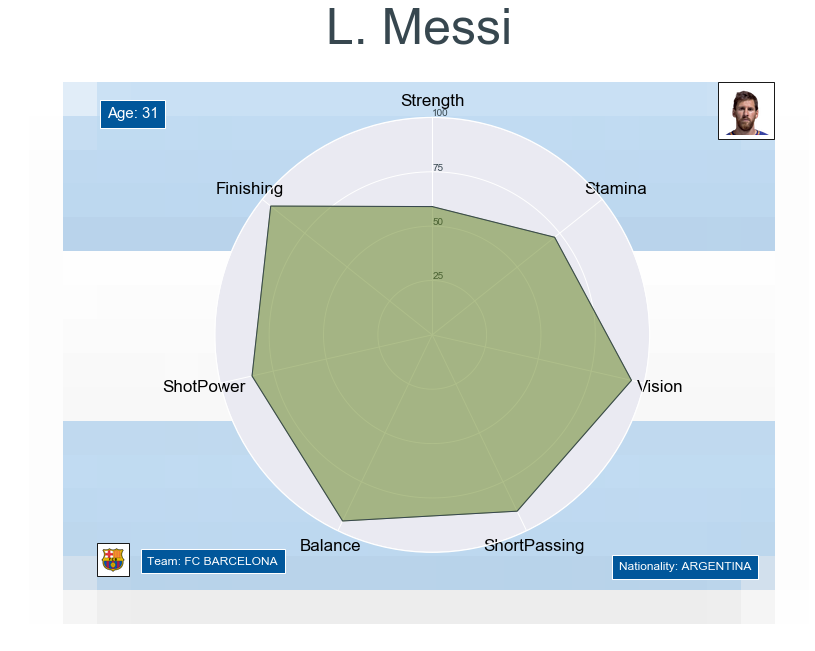

In [61]:
graphPolar(0)

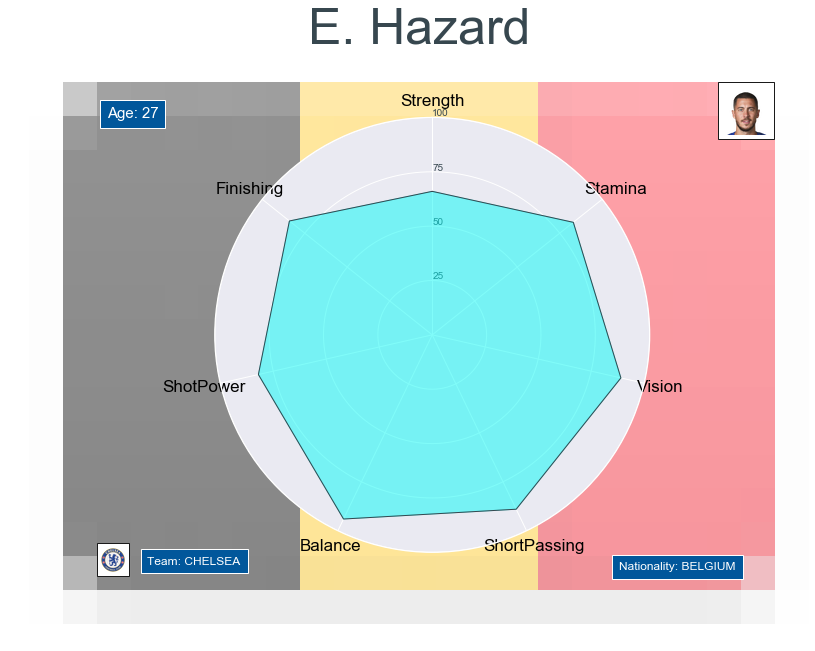

In [63]:
graphPolar(5)

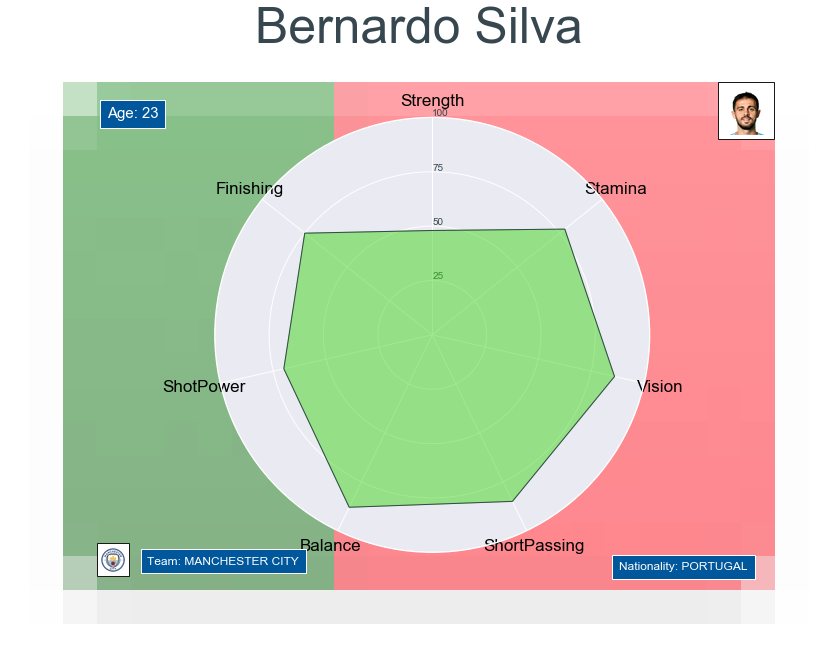

In [66]:
graphPolar(56)

## Conclusion

Hence with this study we can see that Potential of Players is a great indicator that if anyone wants to be good at team building, more emphasis must be on young talent.

## Future Scope

There can be a real time recommendation system that can help give gamers the right information about the player they want to play with. We can also use this study for other sports like Football, Baseball, Basketball etc.

## Other

This Tableau dashboard is related to the same dataset and also very intuitive. Have a look at it. https://public.tableau.com/en-us/s/gallery/fifa-19-top-ranked-players

<h2 style="text-align:center;"> THANK YOU <h2>